<a href="https://colab.research.google.com/github/mazarimono/presentations/blob/main/plotly_dash_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly/Dashによるインタラクティブ・データ可視化入門ハンズオン
## Dash編 / 2020/12/5

- Dashの概要を解説し、最終的にアプリケーションを作成する
- なるだけ手を動かしてもらう
- 今回はjupyter_dashを使う     
  - dash / ウェブアプリケーションを作成するパッケージ
  - jupyter_dash / jupyter上で動作するアプリケーションを作成するパッケージ
    - jupyter_dashの注意点：jupyter上で動作するため、データ分析をするときに使えて便利だったりするが、公開されて時間がたっていないため、うまく動かない理由が分からないことや、そもそも動かない（dashでは動いても）というケースもあるのでちょっと注意を。今回使うのはハンズオンには便利だからです。

## Dashとは
- ウェブフレームワーク
  - React.js, Plotly, Flaskを組み合わせて作成されている
  - コンポーネントを組み合わせてアプリケーションの見た目を作る
    - 引数にデータを渡し、宣言的に作成
  - コールバックを使って、アプリケーションを連鎖的に動かす
    - コールバックを使いこなすと動的なツールが作れる。コールバックが使えないとDashを使う意味がないといって過言ではない
- [公式サンプル](https://dash-gallery.plotly.host/Portal/)
- 私が作ったサンプル
  - [はんなりPython02](https://chomoku.herokuapp.com/hands-on-02)
    - [github](https://github.com/mazarimono/chomoku/blob/master/app1/hands_on_02.py)
  - [はんなりPython03](https://chomoku.herokuapp.com/hands-on-03)
    - [github](https://github.com/mazarimono/chomoku/blob/master/app1/hands_on_03.py)
  - [エクセルなどを読み込み可視化](https://okodukai.herokuapp.com/) : 無料で動かしているので時間がかかります
    - [github](https://github.com/mazarimono/okodukai_upload)
    - [Qiita記事](https://qiita.com/OgawaHideyuki/items/f0d647c5b284b338996b)

- コンポーネントは色々提供されています。どんどん増加中 => [公式ドキュメント](https://dash.plotly.com/)
  - 書籍では次の6つのコンポーネントをとりあげました
    - [Dash HTML Components](https://dash.plotly.com/dash-html-components): HTML構造を作成するコンポーネント
    - [Dash Core Components](https://dash.plotly.com/dash-core-components): ドロップダウンやグラフなどのコンポーネント
    - [Dash DataTable](https://dash.plotly.com/datatable): 表データを扱うためのコンポーネント
    - [Dash Canvas](https://dash.plotly.com/canvas): 画像へのアノテーション機能をもつコンポーネント
    - [Dash Bio](https://dash.plotly.com/dash-bio): バイオインフォマティクス用コンポーネント
    - [Dash DAQ](https://dash.plotly.com/dash-daq): IoTデータの表示に使えるコンポーネント
    - [Dash Cytoscape](https://dash.plotly.com/cytoscape): ネットワーク可視化用コンポーネント
  - 本日ではこの中から主となるDash HTML ComponentsとDash Core Componentsを使ってハンズオンを行います！！(dash_tableも使っているのですが、解説までは時間の都合でできません)

In [1]:
# まずはjupyter_dashパッケージのインストールとplotlyのアップグレード
!pip install jupyter_dash 
!pip install plotly --upgrade

^C


In [1]:
# 必要パッケージのインポート

import dash 

from jupyter_dash import JupyterDash 
import dash_core_components as dcc 
import dash_html_components as html 
from dash_table import DataTable

from dash.dependencies import Input, Output, State

import pandas as pd
import plotly.express as px

## なぜインタラクティブ・データビジュアライゼーション？？
- データは多くなっている
- しかし、依然としてグラフは止まっている
- そこでは多くの重要な事実が取り除かれている可能性が

In [4]:
gapminder = px.data.gapminder()
gapminder.head(10)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
5,Afghanistan,Asia,1977,38.438,14880372,786.113360,AFG,4
6,Afghanistan,Asia,1982,39.854,12881816,978.011439,AFG,4
7,Afghanistan,Asia,1987,40.822,13867957,852.395945,AFG,4
8,Afghanistan,Asia,1992,41.674,16317921,649.341395,AFG,4
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,AFG,4


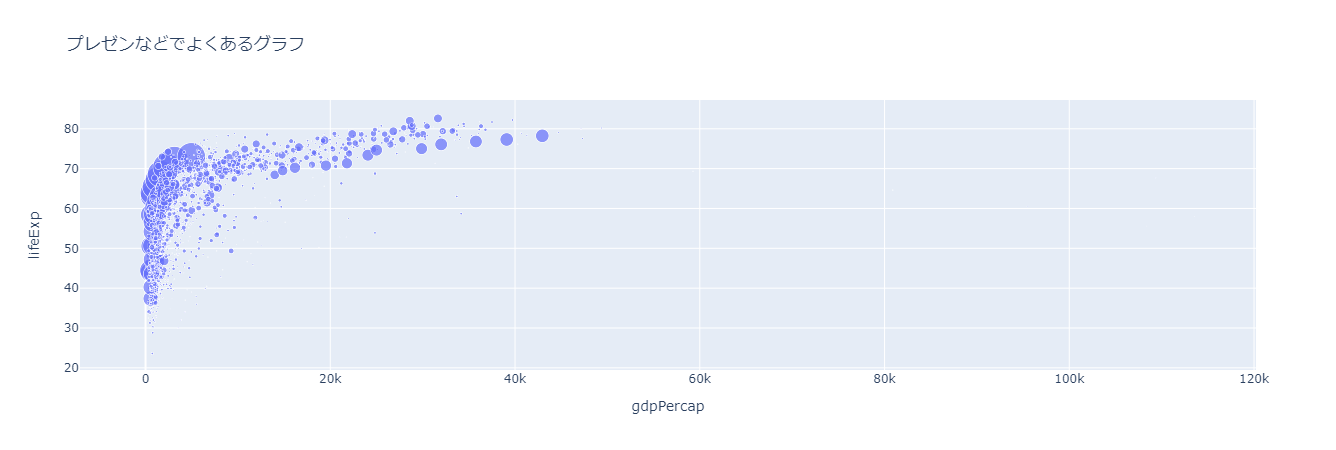

In [6]:
px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', title='プレゼンなどでよくあるグラフ')

## サンプル1
- gapminderデータを使います
- ドロップダウン2つとグラフを1つもつアプリケーションを作成します
- ドロップダウンでは、グラフの種類、国を選択できます



In [3]:
# ドロップダウンの選択によりグラフの種類が更新されるアプリケーション

## 外部cssの指定
external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

## gapminderデータの読み込み
gapminder = px.data.gapminder()

## JupyterDashインスタンスの作成
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

## グラフ種類のリストの作成
graph_type = [px.line, px.scatter, px.bar]

## ドロップダウンを2つ並べて表示するためのスタイル
half_style = {'width': '50%', 'display': 'inline-block'}

## レイアウトの作成
app.layout = html.Div([
                       # H1クラスからH1コンポーネントを作成
                       html.H1('サンプルアプリケーション1'),

                      # 要素を選択できるドロップダウンを2つ配置
                       dcc.Dropdown(id='my_drop1', options=[{'label': type_.__name__, 'value': num}
                                    for num, type_ in enumerate(graph_type)], value=0, style=half_style),
                       dcc.Dropdown(id='my_drop2', options=[{'label': country, 'value': country}
                                    for country in gapminder.country.unique()], value='Japan', style=half_style),
                      # グラフ
                       dcc.Graph(id='my_graph')
])

# コールバック
## ドロップダウンの選択値を反映したグラフを返す

@app.callback(Output('my_graph', 'figure'), Input('my_drop1', 'value'), Input('my_drop2', 'value'))
def update_graph(graph_num, selected_country):
    selected_df = gapminder[gapminder['country'] == selected_country]
    return graph_type[graph_num](selected_df, x='year', y='pop', title=f'{selected_country}の人口の{graph_type[graph_num].__name__}グラフ')

# アプリケーションを動かす
app.run_server(mode='inline')



## サンプル2

- 再びgapminderデータセットを使います
- 散布図で全てのデータを可視化します
- 散布図はアニメーションで時系列で動作します
- 散布図の気になる点をクリックするとその国の人口と1人当たりgdpを横に線グラフで表示します
- 選択した国のデータが下のテーブルに表示され、そのデータがcsvファイルでダウンロードできます

In [4]:

external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

gapminder = px.data.gapminder()

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(
    [
        html.H1("Gapminder Graph"),
        html.H3("左側のグラフの要素をShift+マウスクリックで複数国が選択できます。"),
        html.Div(
            [
                dcc.Graph(
                    id="graph1",
                    figure=px.scatter(
                        gapminder,
                        x="gdpPercap",
                        y="lifeExp",
                        size="pop",
                        color="continent",
                        animation_frame="year",
                        log_x=True,
                        size_max=70,
                        range_y=[20, 90],
                        hover_data=["country"],
                        template={"layout": {"clickmode": "event+select"}},
                    ),
                    style={"width": "50%", "display": "inline-block", "height": 600},
                ),
                html.Div(
                    [
                        dcc.Graph(id="graph2", style={"height": 300}),
                        dcc.Graph(id="graph3", style={"height": 300}),
                    ],
                    style={"width": "50%", "display": "inline-block", "height": 600},
                ),
            ]
        ),
        html.Div(
            [DataTable(id="table", export_format="csv", filter_action="native"),],
            style={"width": "80%", "margin": "auto"},
        ),
    ]
)


@app.callback(
    Output("graph2", "figure"),
    Output("graph3", "figure"),
    Output("table", "columns"),
    Output("table", "data"),
    Input("graph1", "selectedData"),
)
def update_graph(selectedData):
    if selectedData:
        selected_countries = [data["customdata"][0] for data in selectedData["points"]]
        selected_df = gapminder[gapminder["country"].isin(selected_countries)]
        fig1 = px.line(selected_df, x="year", y="pop", color="country", title="各国の人口")
        fig2 = px.line(
            selected_df, x="year", y="gdpPercap", color="country", title="各国の1人当たりGDP"
        )
        columns = [
            {"name": col, "id": col, "deletable": True} for col in selected_df.columns
        ]
        return fig1, fig2, columns, selected_df.to_dict("records")
    raise dash.exceptions.PreventUpdate

app.run_server(mode='inline')

  Attempting uninstall: plotly
    Found existing installation: plotly 4.10.0
    Uninstalling plotly-4.10.0:
      Successfully uninstalled plotly-4.10.0


## 1.コンポーネント
- いくつかのパッケージにより提供されています
- クラスの引数に対して値を渡して作成します
- ここでは **html.H1** コンポーネント、**dcc.Dropdown** コンポーネント、**dcc.Grpah** コンポーネントをとりあげます
  - コンポーネントは最初の文字が大文字になっています
  - helpを使うと各コンポーネントの持つ属性が確認できます





In [5]:
## 引数を調べる場合
help(html.H1)

Help on class H1 in module dash_html_components.H1:

class H1(dash.development.base_component.Component)
 |  H1(children=None, id=undefined, n_clicks=undefined, n_clicks_timestamp=undefined, key=undefined, role=undefined, accessKey=undefined, className=undefined, contentEditable=undefined, contextMenu=undefined, dir=undefined, draggable=undefined, hidden=undefined, lang=undefined, spellCheck=undefined, style=undefined, tabIndex=undefined, title=undefined, loading_state=undefined, **kwargs)
 |  
 |  A H1 component.
 |  H1 is a wrapper for the <h1> HTML5 element.
 |  For detailed attribute info see:
 |  https://developer.mozilla.org/en-US/docs/Web/HTML/Element/h1
 |  
 |  Keyword arguments:
 |  - children (a list of or a singular dash component, string or number; optional): The children of this component
 |  - id (string; optional): The ID of this component, used to identify dash components
 |  in callbacks. The ID needs to be unique across all of the
 |  components in an app.
 |  - n_cl

### H1コンポーネント
- HTMLのH1タグ
- Dash HTML Componentsに含まれる
  - Dash HTML Componentsは全てのHTMLタグを持つ

In [6]:
# 引数 children (第1引数)に文字列は渡す
html.H1('hello plotly-dash-book')

H1('hello plotly-dash-book')

In [7]:
# Dash(JupyterDash)のレイアウトとして表示する

# JupyterDashインスタンスの作成
app = JupyterDash(__name__)

# layout属性にコンポーネントを渡す
app.layout = html.H1('Hello Plotly-Dash-Book')

# サーバをローカルで起動（modeに表示モードを渡す　'inline'だとノートブック上に表示される）
app.run_server(mode='inline')

### Dropdownコンポーネント
- Dash Core ComponentsのDropdownクラス
  - 選択は単一、複数、どちらも可能

In [8]:
dcc.Dropdown(options=[{'label': 'test1', 'value': 'test1'},
                        {'label': 'test2', 'value': 'test2'},
                        {'label': 'test3', 'value': 'test3'}],
               value='test1')

Dropdown(options=[{'label': 'test1', 'value': 'test1'}, {'label': 'test2', 'value': 'test2'}, {'label': 'test3', 'value': 'test3'}], value='test1')

In [9]:
app = JupyterDash(__name__)

# 引数 options に選択肢を渡す
# 選択肢はlabelとvalueをキーとする辞書を用いて作成する
# labelは表示値、valueは内部で扱われる値。
# 引数 value には初期値を渡す。

app.layout = dcc.Dropdown(options=[{'label': 'test1', 'value': 'test_value1'},
                        {'label': 'test2', 'value': 'test_value2'},
                        {'label': 'test3', 'value': 'test_value3'}],
               value='test_value1')

app.run_server(mode='inline')

In [10]:
app = JupyterDash(__name__)

# 複数選択も可能です。
app.layout = dcc.Dropdown(options=[{'label': i, 'value': i} for i in ['test1', 'test2', 'test3', 'test4', 'test5']],
               value=['test1'], multi=True)

app.run_server(mode='inline')

### Graphコンポーネントを用いてグラフを表示する
- 引数figure にplotlyのfigureを渡す

In [11]:
app = JupyterDash(__name__)

app.layout = dcc.Graph(
    figure = px.line(x=[1,2,3,4,5], y=[4,5,6,4,6])
)

app.run_server(mode='inline')

### 課題1　気になるコンポーネントを作成しましょう！
  - [公式ドキュメント](https://dash.plotly.com/)をみて、気になるコンポーネントを作成してみてください
  - 作り方が分からない場合、helpを使って調べてください
  - それでもわからない場合、twitterで#plotlydashbook とタグ付けしてツィートしてください

(10分、解説5分)

## 2.レイアウト
- 文字通り、アプリケーションの外見の構成です
- コンポーネントを組み合わせて作成します
- コンポーネントを組み合わせるには、**html.Div** を用います
  - children属性にリストに格納、もしくは単数のコンポーネントを渡せます

In [12]:
# タイトルと、
# 空のドロップダウンコンポーネントとグラフコンポーネントを持つレイアウト作成する

app = JupyterDash(__name__)



app.layout = html.Div([
                       html.H1('Dashハンズオン'),
                       dcc.Dropdown(),
                       dcc.Graph()
])

app.run_server(mode='inline')

### style属性を使ってCSSを設定する
  - コンポーネントを渡すだけではどんどんコンポーネントが積まれるだけとなります
  - コンポーネントを配置したい場合は、CSSを設定すると配置できます
    - CSSに詳しくない人は[MDNのサイト](https://developer.mozilla.org/en-US/docs/Web/CSS)を参照ください
  - 今回はstyle属性に直接渡してCSSを設定します
    - assetsディレクトリにCSSファイルを設置する
    - Dash Bootstrap Coponents
    - Dashのexternal_stylesheet属性


- 次にタイトルの下に、ドロップダウンとグラフ（空）が並ぶレイアウトを作成します。

In [13]:
app = JupyterDash(__name__)

app.layout = html.Div([
         html.H1('Dashハンズオン',
                 style={'fontSize': '3rem', 'color': 'Red', 'textAlign': 'center'}),
                 html.Div([
                           dcc.Dropdown(),
                          
                 ], style={'width': '50%', 'display': 'inline-block'}),
                 html.Div([
                           dcc.Graph()
                 ], style={'width': '50%', 'display': 'inline-block'})              
])

app.run_server(mode='inline')

### 課題2
- 上のレイアウトのドロップダウンとグラフにデータを渡してください
  - 次に下の画像のように、ドロップダウンを3つ、グラフを2つをならべたレイアウトを作成してください

<a href="https://gyazo.com/13a9ac1503a75cbf2edf55e72a2ed726"><img src="https://i.gyazo.com/13a9ac1503a75cbf2edf55e72a2ed726.png" alt="Image from Gyazo" width="1084"/></a>

  - gapminderのデータを用いて、国名、要素（gdpPercap, pop, lifeExp）、大陸を選択できるドロップダウン、好きな国のgdpPercap, lifeExpを表示するグラフを作成してください

(20分くらい)


## 3.コールバック
  - 何かをきっかけに何かが起こる
    - 例えば、ドロップダウンの値が変わるとグラフの表示が変わるとか
    - 文字を入力されると、何らかの反応を起こすとか

  - 次のアプリケーションは私の誕生日を当てるアプリケーションです
    - できるだけ、コードを見ないで試してください（答えがあるので）

In [18]:
external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# レイアウト
app.layout = html.Div([
                       html.P('問題: 私の誕生日は何月何日でしょう？4文字で答えてください!'),
                       
                       # コールバックに使うコンポーネントはid名を付ける
                       
                       dcc.Input(id='text_input', placeholder='日付を四文字で'),
                       html.H1(id='answer')
])


# コールバック
# Dashクラスのcallbackメソッドに対して、コンポーネントのid名と属性名を渡す
# Output: コールバック関数の出力先の指定。この場合はH1クラス(id名: text_input)のchildren属性を指定している。
# Input: コールバック関数を呼び出すコンポーネントの属性を指定。Inputクラス（id名: answer）のvalue属性を指定している。
# prevent_initial_call属性: bool型。初回のコールバックを起動するかどうか。
# callbackメソッド　Output,Input,State, prevent_initial_call の順番で並べる


@app.callback(Output('answer', 'children'),
              Input('text_input', 'value'),
              prevent_initail_call=True)
def update_anster(input_text):
    if input_text is None:
        raise dash.exceptions.PreventUpdate 
    if len(input_text) == 4:
        if input_text == '1218':
            return '正解です'
        else:
          return '間違いです'
    else:
        return '4文字で入力してください'

app.run_server(mode='inline')

### ドロップダウンでグラフで表示する要素を選択するアプリケーション


In [20]:
app = JupyterDash(__name__)

gapminder = px.data.gapminder()

app.layout = html.Div([
                       dcc.Dropdown(id='my_drop',
                                    options=[{'label': cnt, 'value': cnt} for cnt in gapminder.country.unique()],
                                    value='Japan',

                                    ),
                       dcc.Graph(id='my_graph')
])

@app.callback(Output('my_graph', 'figure'), Input('my_drop', 'value'))
def update_graph(selected_value):
    dff = gapminder[gapminder.country == selected_value]
    return px.line(dff, x='year', y='pop', color='country')

app.run_server(mode='inline')

### コールバックの作り方
- dash.callback に対して次の要素を渡す。
  - 処理したデータの行き先となる属性(Output)
  - 動作のきっかけとなるコンポーネントの属性(Input)
  - 動作に使うコンポーネントの属性(State)
  - 起動直後にコールバックを動作させるかの設定(prevent_initial_call)
- Inputで指定した属性が変化した際に呼び出される関数
  - 関数名、引数名は任意
  - 戻り値はOutputで指定した出力先に渡される

### 課題3
- 上の国名を複数選択できるように更新しましょう
- もう一つドロップダウンを加え、表示要素（現在は人口の表示ですが、gdpPercap, lifeExp）を変更できるようにしましょう。そうすると何を表示しているか分かり難いので、タイトルに要素名を表示するように変更しましょう。     
     
（30分）


### アドベントカレンダー
- [データ可視化アドベントカレンダー](https://qiita.com/advent-calendar/2020/data-visualization)を作成しました
- 今日のことでも何でも書いていただけると幸いです